# Create factor with two thresholds (0.4, 0.6) and vote methods 

In [2]:
import numpy as np
import pandas as pd
from pandas import datetime
import datetime
from snownlp import SnowNLP
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import ast

<ipython-input-2-76351f197f8f>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [161]:
detail_score = pd.read_csv('/home/afan/emotion_analysis/data/processed_data/details_scores_with_sentiment.csv')

In [2]:
sentiment_count = pd.read_csv('/home/afan/emotion_analysis/data/processed_data/sentiment_count.csv')

In [6]:
np.argmax(sentiment_count.iloc[7:9].sum()[1:])

2

In [22]:
sentiment_count.sum()[1:]

-1    261362
0      56164
1     325177
dtype: object

In [162]:
detail_score
log10(r*c+10)

,pub_time,content,scores,read_num,comment_num,Date,sentiment
0,2019-12-31 00:00:00,含德之厚者，比于赤子。一年时光一晃就过，记得2019年第一帖就奉献了华丽的一章，虽然不是新帖...,1.000000,7286,61,2019-12-31,1
1,2019-12-31 00:00:00,周四鸡蛋会跌停吗？,0.115674,1546,7,2019-12-31,-1
2,2019-12-31 00:00:00,祝福慈文2020成为超级大牛股！东霞与骏马齐飞，慈文共华章一色。勇立潮头作品一流，一见惊鸿再...,0.999999,3526,11,2019-12-31,1
3,2019-12-31 00:00:00,2020静待花开,0.276648,1277,146,2019-12-31,-1
4,2019-12-31 00:03:00,祝曙光的朋友们新年快乐，20年身体健康投资顺利,0.999973,3214,28,2019-12-31,1
...,...,...,...,...,...,...,...
642698,2020-07-27 22:41:00,说明价值投资才是上班族正确的投如果从我刚入股市时就一直持有美的，我的收益是6倍，说明价值投资...,0.999717,4891,15,2020-07-27,1
642699,2020-07-27 22:42:00,买一手多，涨一个点，能赚多少钱,0.448511,287,1,2020-07-27,0
642700,2020-07-27 22:44:00,哎，割肉了，不碰它了,0.051191,430,4,2020-07-27,-1
642701,2020-07-27 22:46:00,七位副总裁突击成股东来源：界面新闻 继创维集团(0751.HK)、比亚迪(002594.S...,1.000000,1691,14,2020-07-27,1


In [163]:
read_list = list(detail_score.read_num)

In [164]:
for i in range(len(read_list)):
    if read_list[i][-1] == '万':
        w = float(read_list[i][:-1])*10000
        read_list[i] = w
    else:
        read_list[i] = int(read_list[i])


In [166]:
detail_score['read_num'] = read_list

In [167]:
detail_score.to_csv('/home/afan/emotion_analysis/data/processed_data/details_scores_with_sentiment.csv',index=False)

In [168]:
detail_score = pd.read_csv('/home/afan/emotion_analysis/data/processed_data/details_scores_with_sentiment.csv')

In [171]:
detail_score['log_weight'] = np.log10(detail_score.read_num*detail_score.comment_num+10)

In [173]:
detail_score.to_csv('/home/afan/emotion_analysis/data/processed_data/details_scores_with_log_weight.csv',index=False)

In [174]:
detail_score = pd.read_csv('/home/afan/emotion_analysis/data/processed_data/details_scores_with_log_weight.csv')

In [178]:
detail_score.log_weight.max()

9.088575482268087

In [181]:
sentiment_count_weighted = detail_score.groupby(['Date','sentiment'])['log_weight'].sum()
sentiment_count_weighted = sentiment_count_weighted.unstack()
sentiment_count_weighted

sentiment,-1,0,1
Date,,,
2019-12-31,376.094824,103.160170,610.787896
2020-01-01,2786.261832,510.582767,3473.232090
2020-01-02,7216.026485,1694.630931,8285.596065
2020-01-03,7506.820655,1724.005126,8119.695527
2020-01-04,1905.940445,346.004087,3254.577170
...,...,...,...
2020-07-23,6792.390107,1310.970857,9013.434494
2020-07-24,5423.455879,1065.911484,6827.963702
2020-07-25,1880.838004,286.447540,2990.571215


In [182]:
sentiment_count_weighted.to_csv('/home/afan/emotion_analysis/data/processed_data/sentiment_count_weighted.csv',index=True)

In [183]:

sentiment_count_weighted = pd.read_csv('/home/afan/emotion_analysis/data/processed_data/sentiment_count_weighted.csv')

In [184]:
sentiment_count_weighted

,Date,-1,0,1
0,2019-12-31,376.094824,103.160170,610.787896
1,2020-01-01,2786.261832,510.582767,3473.232090
2,2020-01-02,7216.026485,1694.630931,8285.596065
3,2020-01-03,7506.820655,1724.005126,8119.695527
4,2020-01-04,1905.940445,346.004087,3254.577170
...,...,...,...,...
205,2020-07-23,6792.390107,1310.970857,9013.434494
206,2020-07-24,5423.455879,1065.911484,6827.963702
207,2020-07-25,1880.838004,286.447540,2990.571215
208,2020-07-26,1806.605763,302.968431,2598.760892


In [185]:
sentiment_count_weighted['Date'] = pd.to_datetime(sentiment_count_weighted.Date)

In [186]:
rate = sentiment_count_weighted['1']/sentiment_count_weighted['-1']
rate.mean()
# Positive posts tends to have more comment_num and read_num.

1.367249399854551

In [195]:
print(np.log(rate).mean())
print(np.log(rate).median())

0.30437319803841373
0.27914427063496006


In [188]:
rate.median()

1.3219981152638445

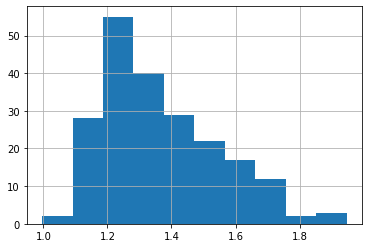

In [190]:
rate_fig = rate.hist().get_figure()

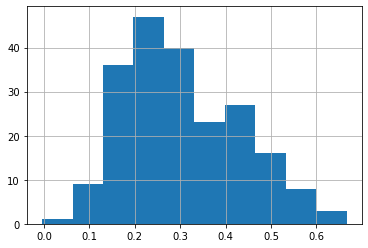

In [192]:
rate_fig = np.log(rate).hist().get_figure()  

In [196]:
sz = pd.read_csv('/home/afan/emotion_analysis/data/processed_data/szzh2020.csv')
sz

,date,收盘
0,2020-12-31,"3,473.07"
1,2020-12-30,"3,414.45"
2,2020-12-29,"3,379.04"
3,2020-12-28,"3,397.29"
4,2020-12-25,"3,396.56"
...,...,...
238,2020-1-8,"3,066.89"
239,2020-1-7,"3,104.80"
240,2020-1-6,"3,083.41"
241,2020-1-3,"3,083.79"


In [198]:
# the total number of days of trading day is 134.
# From 2020-1-6 to 2020-7-27
day_list = sorted(pd.to_datetime(sz.date))[2:136]   
len(day_list)

134